# 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

In [3]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

# 상장종목 목록 가져오기

In [15]:
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(8273, 10)

# 개별 종목의 일별 시세 수집
* 종목코드로 수집이 가능함
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들기

In [9]:
# 삼성전자, 2017~현재 일별 시세 받아오기 ( 삼성전자 종목번호 '005930')
df = fdr.DataReader('005930', "2017","2022")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


<AxesSubplot:xlabel='Date'>

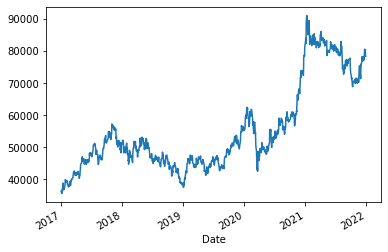

In [11]:
df["Close"].plot()

# 상장종목 목록 사용하기

In [17]:
#df_krx[["Symbol", "Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
8268,003280,흥아해운
8269,037440,희림
8270,419890,히어로즈 단기채권ESG액티브
8271,429870,히어로즈 리츠이지스액티브


In [76]:
# LX세미콘 종목번호 찾기
item_name = "ESR켄달스퀘어리츠"
df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()[0]

'365550'

In [25]:
# '세미콘'이라는 이름 가진 상장사 있는지 확인해보기
df_krx.loc[df_krx["Name"] == "세미콘", "Symbol"].tolist()[0]

IndexError: list index out of range

# 종목명으로 종목 코드 받아오는 함수 만들기

In [36]:
def item_name_to_item_code(item_name):
    
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [42]:
item_name_to_item_code("셀트리온")

'068270'

In [43]:
# 함수 이용해 일별 시세 받아오기
fdr.DataReader(item_name_to_item_code("셀트리온"))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-07-19,5597,6433,5437,6439,0,NaN
2005-07-20,6424,6424,5470,5475,0,-0.149713
2005-07-21,5391,5499,4785,4798,0,-0.123653
2005-07-22,4884,4884,4617,4664,0,-0.027928
2005-07-25,4587,4967,4587,4723,0,0.012650
...,...,...,...,...,...,...
2022-05-25,147000,156000,146500,153000,733133,0.055172
2022-05-26,153500,155500,151500,154000,330103,0.006536
2022-05-27,155000,159000,154500,156000,396744,0.012987


# 종목명으로 일별시세 받아오는 함수 만들기

In [57]:
def find_day_list(item_name, year=2020):
    
    item_code = item_name_to_item_code(item_name)
    if item_code :
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [59]:
find_day_list("NAVER")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,187500,188000,182000,182500,300640,-0.021448
2020-01-03,185000,186000,180500,181500,454492,-0.005479
2020-01-06,180000,182000,178000,180500,287970,-0.005510
2020-01-07,182500,187000,181500,187000,328624,0.036011
2020-01-08,182000,183500,179000,183000,820867,-0.021390
...,...,...,...,...,...,...
2022-05-25,266500,268500,262500,266000,533307,0.000000
2022-05-26,269500,272500,266000,266000,541194,0.000000
2022-05-27,271000,272000,268500,270000,481191,0.015038


## 종목명으로 일별 시세를 잘 가져오는 방법

In [60]:
find_day_list("LG화학")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,321000,321000,313500,314000,139496,-0.011024
2020-01-03,317000,318500,310500,311000,165030,-0.009554
2020-01-06,308000,311000,306500,307000,138154,-0.012862
2020-01-07,306000,313500,305000,311000,133788,0.013029
2020-01-08,306000,307000,301500,302000,225471,-0.028939
...,...,...,...,...,...,...
2022-05-25,549000,550000,534000,534000,198348,-0.009276
2022-05-26,543000,547000,533000,534000,240223,0.000000
2022-05-27,541000,564000,541000,550000,330735,0.029963


In [63]:
stock_daily = find_day_list("LX세미콘")
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,39850,39850,38700,39300,82034,-0.012563
2020-01-03,39700,40500,39400,39550,100043,0.006361
2020-01-06,38900,40450,38700,40100,137604,0.013906
2020-01-07,40100,42950,39800,42700,316142,0.064838
2020-01-08,42400,42700,40200,40200,169123,-0.058548
...,...,...,...,...,...,...
2022-05-25,125900,127100,124100,125400,120343,0.004003
2022-05-26,125700,126900,122100,122900,121648,-0.019936
2022-05-27,124700,124800,122800,123000,86646,0.000814


# 개별종목 시세 시각화

## pandas의 Plot으로 시각화 하기

<AxesSubplot:xlabel='Date'>

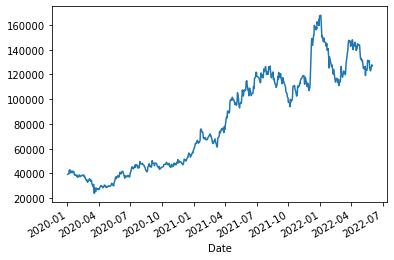

In [65]:
stock_daily["Close"].plot()

<AxesSubplot:xlabel='Date'>

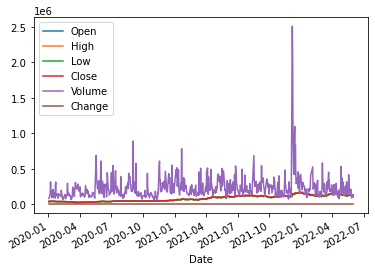

In [66]:
stock_daily.plot()

## 서브플롯 그리기

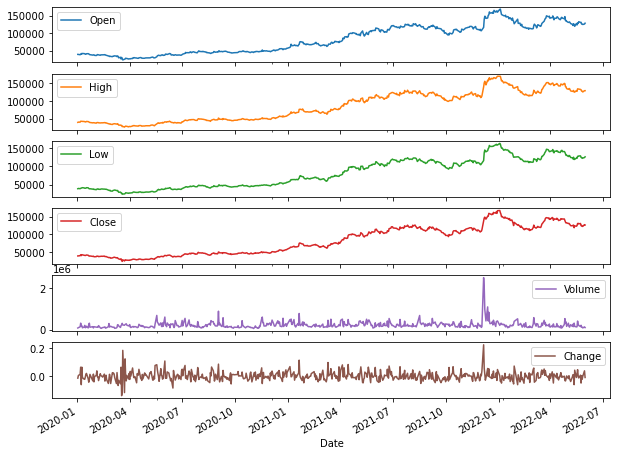

In [69]:
g = stock_daily.plot(subplots=True, figsize=(10,8))

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Change'}>]], dtype=object)

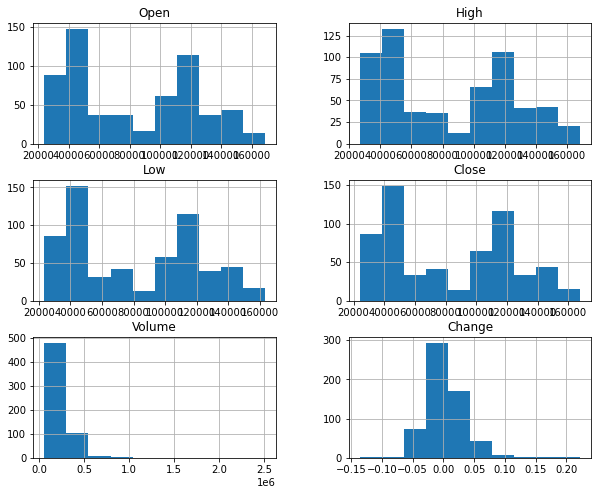

In [71]:
# 히스토그램 그리기
stock_daily.hist(figsize=(10,8))

## 2축 그래프 그리기

<AxesSubplot:xlabel='Date'>

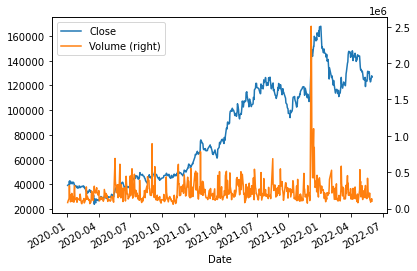

In [74]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume")

In [75]:
1e6

1000000.0